         date  data
0  1960-01-01  0.71
1  1960-04-01  0.63
2  1960-07-02  0.85
3  1960-10-01  0.44
4  1961-01-01  0.61
          date   data
79  1979-10-01   9.99
80  1980-01-01  16.20
81  1980-04-01  14.67
82  1980-07-02  16.02
83  1980-10-01  11.61


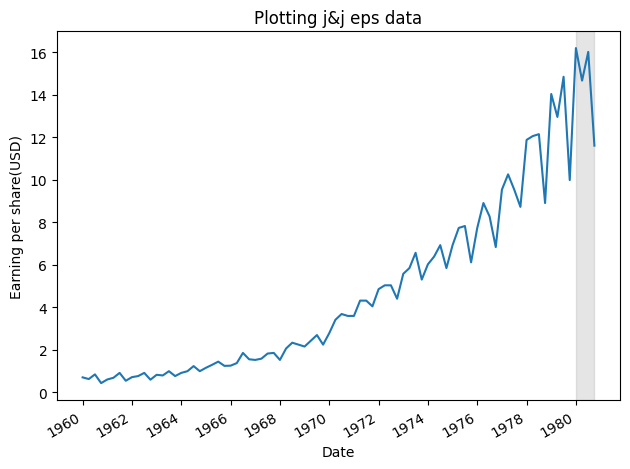

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\DBDA\Adavance Stats\DAy 10\jj.csv")
print(df.head())
print(df.tail())

fig,ax = plt.subplots()
ax.plot(df["date"], df["data"])

ax.set_title("Plotting j&j eps data")
ax.set_xlabel("Date")
ax.set_ylabel("Earning per share(USD)")

ax.axvspan(80,83,color="#808080",alpha = 0.2)

plt.xticks(np.arange(0,81,8),[1960,1962,1964,1966,1968,1970,1972,1974,1976,1978,1980])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [69]:
# split the train test

train = df[:-4] # exclude last 4 records
test =df[-4:]  # exclude last 4 records only

# use mean of entire dataset as predictor
historical_mean = np.mean(train['data'])

print(historical_mean)

test.loc[:,'pred_mean'] = historical_mean # Add a new column to the DF
print(test)

4.308499987499999
          date   data  pred_mean
80  1980-01-01  16.20     4.3085
81  1980-04-01  14.67     4.3085
82  1980-07-02  16.02     4.3085
83  1980-10-01  11.61     4.3085


C:\Users\dbda\AppData\Local\Temp\ipykernel_8756\2341506411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pred_mean'] = historical_mean # Add a new column to the DF


In [70]:
# Calculate the Mean Absolute Percentage Error (MAPE)

# lower MAPE value indicates better model accuracy , and a MAPE of 0% would mean that models predictions are perfectly acciurate

# Performed between two arrays or list of values , typically used for assessing the accuracy of predictive models , such as forecasting models 

# y_true : This is an array or list of true values(observed) . These are the actual values generated by predictive model

# y_pred : This is an array or list of predicted values. These are the values generateed by predictive model

# After each p[rediction , we are displaying MAPE va;lues - note where it is the smallest - that  is our best prediction


def mape(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

mape_hist_mean =mape(test['data'],test['pred_mean'])
print(mape_hist_mean)




70.00752579965119


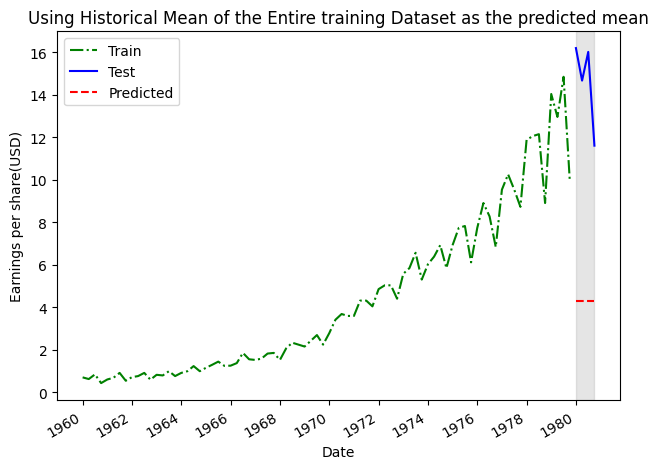

In [71]:
fig ,ax=plt.subplots()

ax.plot(train['date'],train['data'],'g-.',label='Train')

ax.plot(test['date'],test['data'],'b-',label='Test')

ax.plot(test['date'],test['pred_mean'],'r--',label='Predicted')

ax.set_title("Using Historical Mean of the Entire training Dataset as the predicted mean")

ax.set_xlabel("Date")
ax.set_ylabel("Earnings per share(USD)")

ax.axvspan(80,83,color='#808080',alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,85,8),[1960,1962,1964,1966,1968,1970,1972,1974,1976,1978,1980])

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

In [72]:
# Method 2

""" Predict last year mean(i.e for 1980 ) using only the last year training data
Remember our training data set contains data upto year 1979 only , so it will be the mean for 1979

"""

last_year_mean = np.mean(train['data'][-4:])
print(last_year_mean)

""" Now add this last years predicted mean to the testing data 

"""
test.loc[:,'pred_last_yr_mean']=last_year_mean
print(test)

mape_last_year_mean = mape(test['data'],test['pred_last_yr_mean'])
print(last_year_mean)


# better than earlier , but still quite poor

12.96
          date   data  pred_mean  pred_last_yr_mean
80  1980-01-01  16.20     4.3085              12.96
81  1980-04-01  14.67     4.3085              12.96
82  1980-07-02  16.02     4.3085              12.96
83  1980-10-01  11.61     4.3085              12.96
12.96


C:\Users\dbda\AppData\Local\Temp\ipykernel_8756\1685480689.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pred_last_yr_mean']=last_year_mean


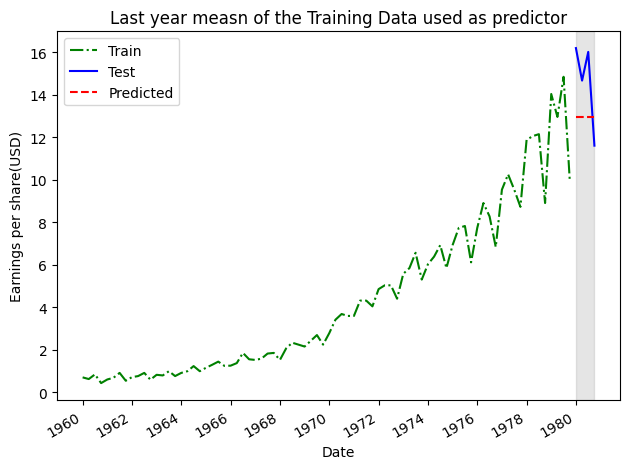

In [73]:
fig,ax =plt.subplots()



ax.plot(train['date'],train['data'],'g-.',label='Train')

ax.plot(test['date'],test['data'],'b-',label='Test')

ax.plot(test['date'],test['pred_last_yr_mean'],'r--',label='Predicted')

ax.set_title("Last year measn of the Training Data used as predictor")

ax.set_xlabel("Date")
ax.set_ylabel("Earnings per share(USD)")

ax.axvspan(80,83,color='#808080',alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,85,8),[1960,1962,1964,1966,1968,1970,1972,1974,1976,1978,1980])

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

In [74]:
# predict using last known value i.e. the last (single) value ofthe training data

last =train['data'].iloc[-1]
print(last)

test.loc[:,'pred_last']=last
print(test)

9.99
          date   data  pred_mean  pred_last_yr_mean  pred_last
80  1980-01-01  16.20     4.3085              12.96       9.99
81  1980-04-01  14.67     4.3085              12.96       9.99
82  1980-07-02  16.02     4.3085              12.96       9.99
83  1980-10-01  11.61     4.3085              12.96       9.99


C:\Users\dbda\AppData\Local\Temp\ipykernel_8756\102142639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pred_last']=last


In [75]:
mape_last =mape(test['data'],test['pred_last'])
print(mape_last)

30.457277908606535


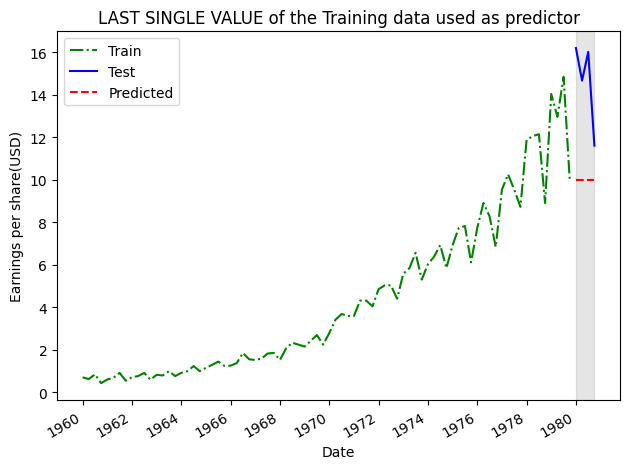

In [79]:
fig,ax =plt.subplots()

ax.plot(train['date'],train['data'],'g-.',label='Train')

ax.plot(test['date'],test['data'],'b-',label='Test')

ax.plot(test['date'],test['pred_last'],'r--',label='Predicted')

ax.set_title("LAST SINGLE VALUE of the Training data used as predictor")

ax.set_xlabel("Date")
ax.set_ylabel("Earnings per share(USD)")

ax.axvspan(80,83,color='#808080',alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,85,8),[1960,1962,1964,1966,1968,1970,1972,1974,1976,1978,1980])

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

In [77]:
#method 4

# Seasonal forecast
# use the last year(1979) of the training data and use its four individual values(not mean) as the predictor

test.loc[:,'pred_last_season'] =train['data'][-4:].values
print(test)

mape_naive_seasonal = mape(test['data'],test['pred_last_season'])
print(mape_naive_seasonal)

          date   data  pred_mean  pred_last_yr_mean  pred_last  \
80  1980-01-01  16.20     4.3085              12.96       9.99   
81  1980-04-01  14.67     4.3085              12.96       9.99   
82  1980-07-02  16.02     4.3085              12.96       9.99   
83  1980-10-01  11.61     4.3085              12.96       9.99   

    pred_last_season  
80             14.04  
81             12.96  
82             14.85  
83              9.99  
11.561658552433654


C:\Users\dbda\AppData\Local\Temp\ipykernel_8756\3568053434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pred_last_season'] =train['data'][-4:].values


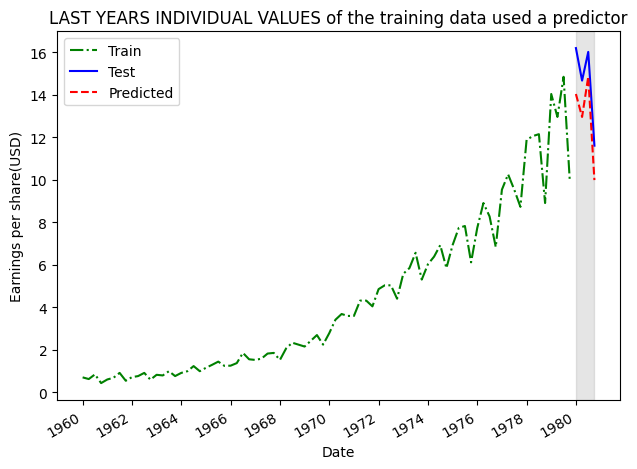

In [80]:
fig,ax =plt.subplots()

ax.plot(train['date'],train['data'],'g-.',label='Train')

ax.plot(test['date'],test['data'],'b-',label='Test')

ax.plot(test['date'],test['pred_last_season'],'r--',label='Predicted')

ax.set_title("LAST YEARS INDIVIDUAL VALUES of the training data used a predictor")

ax.set_xlabel("Date")
ax.set_ylabel("Earnings per share(USD)")

ax.axvspan(80,83,color='#808080',alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,85,8),[1960,1962,1964,1966,1968,1970,1972,1974,1976,1978,1980])

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

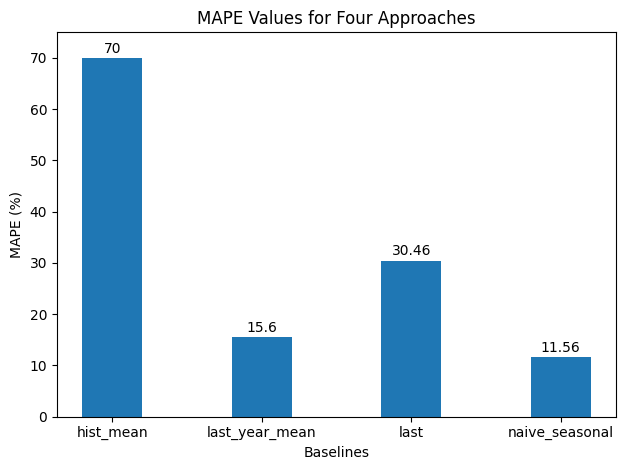

In [87]:
import matplotlib.pyplot as plt

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70, 15.60, 30.46, 11.56]

fig, ax = plt.subplots()  # Create a figure and an axes object

ax.bar(x, y, width=0.4)  # Create the bar plot

ax.set_title("MAPE Values for Four Approaches")
ax.set_xlabel("Baselines")
ax.set_ylabel("MAPE (%)")
ax.set_ylim(0, 75)  # Set y-axis limits

# Add numerical labels above each bar
for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')  # Adjust y-position for visibility

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
